In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gdal
import pandas as pd
from google.colab import drive
from datetime import date
import glob as glob
from scipy.interpolate import interp1d
from scipy.misc import derivative
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import gdal
import pandas as pd
from google.colab import drive
from datetime import date


drive.mount('/content/drive')
filenames = glob.glob('/content/drive/Shareddrives/Alireza/Fanap/Fanapp_harvest_milad/*.csv')


drive.mount('/content/drive')

path_file1 = '/content/drive/Shareddrives/Alireza/Fanap/Final samples.xlsx'

header = np.array(pd.read_excel(path_file1, header = None))

### In this part, just main parts of the dates will be remained
for i in range(header.shape[1]-2):
  header[0,i] = header[0,i][0:8]

header = header[:,8:]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def my_function(input_function_address):
  path_file1 = input_function_address

  data = np.array(pd.read_csv(path_file1, header = None))

  ### In this part, just main parts of the dates will be remained
  for i in range(data.shape[1]-2):
    data[0,i] = data[0,i][0:8]

  data_ref_withoutheader = data[1:,:].astype('float')
  data_ref_withoutheader = np.delete(data_ref_withoutheader, np.where(data_ref_withoutheader[:,0]==11)[0], axis=0)
  data_ref_withoutheader = np.delete(data_ref_withoutheader, np.where(data_ref_withoutheader[:,0]==10)[0], axis=0)
  data_ref_withoutheader = np.delete(data_ref_withoutheader, np.where(data_ref_withoutheader[:,0]==9)[0], axis=0)
  data_ref_withoutheader = np.delete(data_ref_withoutheader, np.where(data_ref_withoutheader[:,0]==8)[0], axis=0)
  # sorted_array = data_ref_withoutheader[np.argsort(data_ref_withoutheader[:, 0])]

  # np.where(sorted_array[:,0]==11)

  newdata = data_ref_withoutheader[:,8:]
  newdata = np.vstack((header[0,:], newdata))

  # Here we compute number of days interval
  d0 = date(int(newdata[0,0][0:4]), int(newdata[0,0][4:6]), int(newdata[0,0][6:8]))
  d1 = date(int(newdata[0,-3][0:4]), int(newdata[0,-3][4:6]),  int(newdata[0,-3][6:8]))
  delta = d1 - d0
  diff_firstdate_enddate = delta.days

  # We want to interpolate daily on X
  x = np.linspace(0, diff_firstdate_enddate, num = diff_firstdate_enddate+1).astype(int)

  # Our daates based on daily X: X-scaled
  x_scaled = []
  for i in range(newdata.shape[1]-2):
    d0 = date(int(newdata[0,0][0:4]), int(newdata[0,0][4:6]), int(newdata[0,0][6:8]))
    d1 = date(int(newdata[0,i][0:4]), int(newdata[0,i][4:6]),  int(newdata[0,i][6:8]))
    delta = d1 - d0
    x_scaled.append(delta.days)

  x_scaled = np.array(x_scaled)

  maxdays = x[-1]
  mindays = x[0]

  Kasht_harvest = np.zeros((newdata.shape[0]-1, 2))
  y = np.zeros((newdata.shape[0]-1, x.shape[0]))
  for i in range(newdata.shape[0]-1):
    Y_scaled = newdata[i+1, :-2].astype('float')
    where_is_nan = np.isnan(newdata[i+1, :-2].astype('float'))
    datanew = Y_scaled[~where_is_nan]
    x_scaled_new = x_scaled[~where_is_nan]

    X_std = (datanew - np.min(datanew)) / (np.max(datanew) - np.min(datanew))
    datanew = X_std * (maxdays - mindays) + mindays

    f = interp1d(x_scaled_new, datanew, kind = 'cubic')
    y[i, :] = f(x)

  return y

In [ ]:
y1 = my_function(filenames[0])
y2 = my_function(filenames[1])
y3 = my_function(filenames[2])
y4 = my_function(filenames[3])
y5 = my_function(filenames[4])
y6 = my_function(filenames[5])
y7 = my_function(filenames[6])
y8 = my_function(filenames[7])
y9 = my_function(filenames[8])

In [ ]:
filenames[3]

'/content/drive/Shareddrives/Alireza/Fanap/Fanapp_harvest_milad/GT_shahrak_ndre3.csv'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gdal
import pandas as pd
from google.colab import drive
from datetime import date

drive.mount('/content/drive')

path_file1 = filenames[3]

data = np.array(pd.read_csv(path_file1, header = None))

### In this part, just main parts of the dates will be remained
for i in range(data.shape[1]-2):
  data[0,i] = data[0,i][0:8]

import numpy as np
import matplotlib.pyplot as plt
import gdal
import pandas as pd
from google.colab import drive
from datetime import date

drive.mount('/content/drive')

path_file1 = '/content/drive/Shareddrives/Alireza/Fanap/Final samples.xlsx'

header = np.array(pd.read_excel(path_file1, header = None))

### In this part, just main parts of the dates will be remained
for i in range(header.shape[1]-2):
  header[0,i] = header[0,i][0:8]

header = header[:,8:]

data_ref_withoutheader = data[1:,:].astype('float')
data_ref_withoutheader = np.delete(data_ref_withoutheader, np.where(data_ref_withoutheader[:,0]==11)[0], axis=0)
data_ref_withoutheader = np.delete(data_ref_withoutheader, np.where(data_ref_withoutheader[:,0]==10)[0], axis=0)
data_ref_withoutheader = np.delete(data_ref_withoutheader, np.where(data_ref_withoutheader[:,0]==9)[0], axis=0)
data_ref_withoutheader = np.delete(data_ref_withoutheader, np.where(data_ref_withoutheader[:,0]==8)[0], axis=0)
# sorted_array = data_ref_withoutheader[np.argsort(data_ref_withoutheader[:, 0])]

# np.where(sorted_array[:,0]==11)

newdata = data_ref_withoutheader[:,8:]
newdata = np.vstack((header[0,:], newdata))

# ## Here I put the first 7 Time series aside, start from 20201009
# IDs = data[:94,0]
# newdata = data[:94,8:]

# Here we compute number of days interval
d0 = date(int(newdata[0,0][0:4]), int(newdata[0,0][4:6]), int(newdata[0,0][6:8]))
d1 = date(int(newdata[0,-3][0:4]), int(newdata[0,-3][4:6]),  int(newdata[0,-3][6:8]))
delta = d1 - d0
diff_firstdate_enddate = delta.days

# We want to interpolate daily on X
x = np.linspace(0, diff_firstdate_enddate, num = diff_firstdate_enddate+1).astype(int)

# Our daates based on daily X: X-scaled
x_scaled = []
for i in range(newdata.shape[1]-2):
  d0 = date(int(newdata[0,0][0:4]), int(newdata[0,0][4:6]), int(newdata[0,0][6:8]))
  d1 = date(int(newdata[0,i][0:4]), int(newdata[0,i][4:6]),  int(newdata[0,i][6:8]))
  delta = d1 - d0
  x_scaled.append(delta.days)

x_scaled = np.array(x_scaled)

from scipy.interpolate import interp1d
from scipy.misc import derivative
from functools import reduce

maxdays = x[-1]
mindays = x[0]

Kasht_harvest = np.zeros((newdata.shape[0]-1, 2))
y = np.zeros((newdata.shape[0]-1, x.shape[0]))
for i in range(newdata.shape[0]-1):
  Y_scaled = newdata[i+1, :-2].astype('float')
  where_is_nan = np.isnan(newdata[i+1, :-2].astype('float'))
  datanew = Y_scaled[~where_is_nan]
  x_scaled_new = x_scaled[~where_is_nan]

  X_std = (datanew - np.min(datanew)) / (np.max(datanew) - np.min(datanew))
  datanew = X_std * (maxdays - mindays) + mindays

  f = interp1d(x_scaled_new, datanew, kind = 'cubic')
  y[i, :] = f(x)

  first_der = derivative(f, x[1:-1], dx=1e-6, n = 1)
  sec_der = derivative(f, x[2:-2], dx=1e-6, n = 2)


  max_argument = np.argmax(y[i, :])

  Th_first_der = 0.5
  Th_ndvi1 = 100
  Th_ndvi2 = 100

  id1 = np.where(abs(first_der[max_argument:]) < Th_first_der)
  id2 = np.where(sec_der[max_argument:] > 0)
  id3 = np.where(y[i, max_argument:] < Th_ndvi1)

  id4 = np.where(abs(first_der[:max_argument]) < Th_first_der)
  id5 = np.where(sec_der[:max_argument] > 0)
  id6 = np.where(y[i, :max_argument] < Th_ndvi2)

  if reduce(np.intersect1d, (id4, id5, id6)).shape[0]==0:
    continue
  if reduce(np.intersect1d, (id1, id2, id3)).shape[0]==0:
    continue

  print(i)
  Kasht_harvest[i,1] = reduce(np.intersect1d, (id1, id2, id3))[0] + max_argument
  Kasht_harvest[i,0] = reduce(np.intersect1d, (id4, id5, id6))[-1]

Kasht_harvest[3,0] = 125
Kasht_harvest[5,0] = 125
Kasht_harvest[9,0] = 125
Kasht_harvest[10,0] = 125
Kasht_harvest[13,0] = 124

Kasht_harvest[15,0] = 110
Kasht_harvest[15,1] = 270

Kasht_harvest[22,0] = 110
Kasht_harvest[22,1] = 260

Kasht_harvest[24,0] = 120

Kasht_harvest[25,0] = 120
Kasht_harvest[25,1] = 280

Kasht_harvest[29,0] = 240

Kasht_harvest[36,0] = 220
Kasht_harvest[36,1] = 410

Kasht_harvest[37,0] = 220
Kasht_harvest[37,1] = 410

Kasht_harvest[40,0] = 220
Kasht_harvest[40,1] = 410

Kasht_harvest[41,0] = 120
Kasht_harvest[41,1] = 300

Kasht_harvest[43,1] = 315

Kasht_harvest[44,0] = 120
Kasht_harvest[44,1] = 300

Kasht_harvest[50,0] = 120
Kasht_harvest[50,1] = 290

Kasht_harvest[57,0] = 230

Kasht_harvest[59,1] = 360

Kasht_harvest[61,0] = 120
Kasht_harvest[61,1] = 320

Kasht_harvest[64,0] = 120
Kasht_harvest[64,1] = 320

Kasht_harvest[65,0] = 130
Kasht_harvest[65,1] = 310

Kasht_harvest[66,0] = 130
Kasht_harvest[66,1] = 310

Kasht_harvest[67,1] = 280

Kasht_harvest[69,0] = 120

Kasht_harvest[71,0] = 130
Kasht_harvest[71,1] = 300

Kasht_harvest[83,0] = 260

Kasht_harvest[85,0] = 270

Kasht_harvest[89,1] = 400

Kasht_harvest[92,1] = 390

from datetime import date, timedelta

specific_date = date(int(newdata[0,0][0:4]), int(newdata[0,0][4:6]), int(newdata[0,0][6:]))
# specific_date = date(2011, 10, 10)

Kasht_date = []
harvest_date = []
for i in range(Kasht_harvest.shape[0]):
  # Kasht_date_computed = specific_date + timedelta(days = int(Kasht_harvest[i,0]))
  # harvest_date_computed = specific_date + timedelta(days = int(Kasht_harvest[i,1]))
  Kasht_date.append(specific_date + timedelta(days = int(Kasht_harvest[i,0])))
  harvest_date.append(specific_date + timedelta(days = int(Kasht_harvest[i,1])))

print(Kasht_date)

In [ ]:
# X = np.hstack((y1,y2,y3,y4,y5,y6,y7,y8))
Y = Kasht_harvest[:,1]-Kasht_harvest[:,0]
X = np.hstack((y1,y2,y3,y4,y5,y6,y7, y8, np.reshape(Y, (-1,1))))

(93, 3329)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error




Y = Kasht_harvest[:,1]-Kasht_harvest[:,0]
# X = np.hstack((y1,y2,y3,y4,y5,y6,y7,y8))
X = y5
regr = SVR(C=100.0, epsilon=0.2)
regr.fit(X, Y)

YY = regr.predict(X)

mean_squared_error(YY, Y, squared=False)

17.362405219967716

In [ ]:
from scipy.interpolate import interp1d
from scipy.misc import derivative
from functools import reduce

maxdays = x[-1]
mindays = x[0]

Kasht_harvest = np.zeros((newdata.shape[0]-1, 2))
y = np.zeros((newdata.shape[0]-1, x.shape[0]))
for i in range(newdata.shape[0]-1):
  Y_scaled = newdata[i+1, :-2].astype('float')
  where_is_nan = np.isnan(newdata[i+1, :-2].astype('float'))
  datanew = Y_scaled[~where_is_nan]
  x_scaled_new = x_scaled[~where_is_nan]

  X_std = (datanew - np.min(datanew)) / (np.max(datanew) - np.min(datanew))
  datanew = X_std * (maxdays - mindays) + mindays

  f = interp1d(x_scaled_new, datanew, kind = 'cubic')
  y[i, :] = f(x)

  first_der = derivative(f, x[1:-1], dx=1e-6, n = 1)
  sec_der = derivative(f, x[2:-2], dx=1e-6, n = 2)


  max_argument = np.argmax(y[i, :])

  Th_first_der = 0.5
  Th_ndvi1 = 100
  Th_ndvi2 = 100

  id1 = np.where(abs(first_der[max_argument:]) < Th_first_der)
  id2 = np.where(sec_der[max_argument:] > 0)
  id3 = np.where(y[i, max_argument:] < Th_ndvi1)

  id4 = np.where(abs(first_der[:max_argument]) < Th_first_der)
  id5 = np.where(sec_der[:max_argument] > 0)
  id6 = np.where(y[i, :max_argument] < Th_ndvi2)

  if reduce(np.intersect1d, (id4, id5, id6)).shape[0]==0:
    continue
  if reduce(np.intersect1d, (id1, id2, id3)).shape[0]==0:
    continue

  print(i)
  Kasht_harvest[i,1] = reduce(np.intersect1d, (id1, id2, id3))[0] + max_argument
  Kasht_harvest[i,0] = reduce(np.intersect1d, (id4, id5, id6))[-1]

Kasht_harvest[3,0] = 125
Kasht_harvest[5,0] = 125
Kasht_harvest[9,0] = 125
Kasht_harvest[10,0] = 125
Kasht_harvest[13,0] = 124

Kasht_harvest[15,0] = 110
Kasht_harvest[15,1] = 270

Kasht_harvest[22,0] = 110
Kasht_harvest[22,1] = 260

Kasht_harvest[24,0] = 120

Kasht_harvest[25,0] = 120
Kasht_harvest[25,1] = 280

Kasht_harvest[29,0] = 240

Kasht_harvest[36,0] = 220
Kasht_harvest[36,1] = 410

Kasht_harvest[37,0] = 220
Kasht_harvest[37,1] = 410

Kasht_harvest[40,0] = 220
Kasht_harvest[40,1] = 410

Kasht_harvest[41,0] = 120
Kasht_harvest[41,1] = 300

Kasht_harvest[43,1] = 315

Kasht_harvest[44,0] = 120
Kasht_harvest[44,1] = 300

Kasht_harvest[50,0] = 120
Kasht_harvest[50,1] = 290

Kasht_harvest[57,0] = 230

Kasht_harvest[59,1] = 360

Kasht_harvest[61,0] = 120
Kasht_harvest[61,1] = 320

Kasht_harvest[64,0] = 120
Kasht_harvest[64,1] = 320

Kasht_harvest[65,0] = 130
Kasht_harvest[65,1] = 310

Kasht_harvest[66,0] = 130
Kasht_harvest[66,1] = 310

Kasht_harvest[67,1] = 280

Kasht_harvest[69,0] = 120

Kasht_harvest[71,0] = 130
Kasht_harvest[71,1] = 300

Kasht_harvest[83,0] = 260

Kasht_harvest[85,0] = 270

Kasht_harvest[89,1] = 400

Kasht_harvest[92,1] = 390


In [ ]:
from datetime import date, timedelta

specific_date = date(int(newdata[0,0][0:4]), int(newdata[0,0][4:6]), int(newdata[0,0][6:]))
# specific_date = date(2011, 10, 10)

Kasht_date = []
harvest_date = []
for i in range(Kasht_harvest.shape[0]):
  # Kasht_date_computed = specific_date + timedelta(days = int(Kasht_harvest[i,0]))
  # harvest_date_computed = specific_date + timedelta(days = int(Kasht_harvest[i,1]))
  Kasht_date.append(specific_date + timedelta(days = int(Kasht_harvest[i,0])))
  harvest_date.append(specific_date + timedelta(days = int(Kasht_harvest[i,1])))

print(Kasht_date)

[datetime.date(2021, 2, 6), datetime.date(2021, 3, 27), datetime.date(2021, 2, 15), datetime.date(2021, 2, 11), datetime.date(2021, 2, 11), datetime.date(2021, 2, 11), datetime.date(2021, 2, 17), datetime.date(2021, 2, 13), datetime.date(2021, 2, 14), datetime.date(2021, 2, 11), datetime.date(2021, 2, 11), datetime.date(2021, 2, 9), datetime.date(2021, 2, 13), datetime.date(2021, 2, 10), datetime.date(2021, 2, 13), datetime.date(2021, 1, 27), datetime.date(2021, 2, 18), datetime.date(2021, 2, 2), datetime.date(2021, 2, 14), datetime.date(2021, 1, 28), datetime.date(2021, 2, 9), datetime.date(2020, 11, 2), datetime.date(2021, 1, 27), datetime.date(2020, 11, 2), datetime.date(2021, 2, 6), datetime.date(2021, 2, 6), datetime.date(2021, 2, 13), datetime.date(2021, 4, 30), datetime.date(2021, 2, 21), datetime.date(2021, 6, 6), datetime.date(2021, 5, 28), datetime.date(2021, 6, 15), datetime.date(2021, 5, 20), datetime.date(2021, 5, 14), datetime.date(2021, 5, 31), datetime.date(2021, 5, 16)

In [ ]:
y.shape

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error



n_samples, n_features = y.shape[0], y.shape[1]

Y = Kasht_harvest[:,1]-Kasht_harvest[:,0]
X = y
regr = SVR(C=1.0, epsilon=0.2)
regr.fit(X, Y)

YY = regr.predict(X)

mean_squared_error(YY, Y, squared=False)

In [ ]:
Kasht_harvest

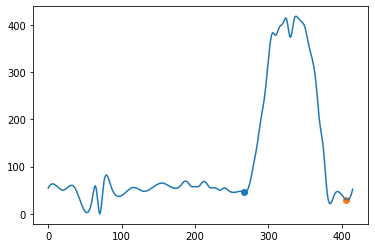

In [ ]:
id = 92
plt.scatter(int(Kasht_harvest[id,0]), y[id, int(Kasht_harvest[id,0])])
plt.scatter(int(Kasht_harvest[id,1]), y[id, int(Kasht_harvest[id,1])])
plt.plot(x, y[id,:])

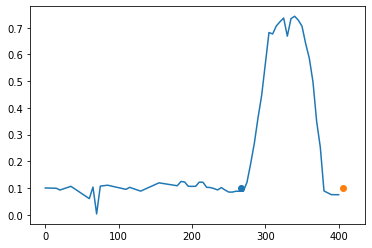

In [ ]:
plt.plot(x_scaled, newdata[id+1,:-2])
plt.scatter(int(Kasht_harvest[id,0]), 0.1)
plt.scatter(int(Kasht_harvest[id,1]), 0.1)

In [ ]:
Kasht_harvest[3,0] = 125
Kasht_harvest[5,0] = 125
Kasht_harvest[9,0] = 125
Kasht_harvest[10,0] = 125
Kasht_harvest[13,0] = 124

Kasht_harvest[15,0] = 110
Kasht_harvest[15,1] = 270

Kasht_harvest[22,0] = 110
Kasht_harvest[22,1] = 260

Kasht_harvest[24,0] = 120

Kasht_harvest[25,0] = 120
Kasht_harvest[25,1] = 280

Kasht_harvest[29,0] = 240

Kasht_harvest[36,0] = 220
Kasht_harvest[36,1] = 410

Kasht_harvest[37,0] = 220
Kasht_harvest[37,1] = 410

Kasht_harvest[40,0] = 220
Kasht_harvest[40,1] = 410

Kasht_harvest[41,0] = 120
Kasht_harvest[41,1] = 300

Kasht_harvest[43,1] = 315

Kasht_harvest[44,0] = 120
Kasht_harvest[44,1] = 300

Kasht_harvest[50,0] = 120
Kasht_harvest[50,1] = 290

Kasht_harvest[57,0] = 230

Kasht_harvest[59,1] = 360

Kasht_harvest[61,0] = 120
Kasht_harvest[61,1] = 320

Kasht_harvest[64,0] = 120
Kasht_harvest[64,1] = 320

Kasht_harvest[65,0] = 130
Kasht_harvest[65,1] = 310

Kasht_harvest[66,0] = 130
Kasht_harvest[66,1] = 310

Kasht_harvest[67,1] = 280

Kasht_harvest[69,0] = 120

Kasht_harvest[71,0] = 130
Kasht_harvest[71,1] = 300

Kasht_harvest[83,0] = 260

Kasht_harvest[85,0] = 270

Kasht_harvest[89,1] = 400

Kasht_harvest[92,1] = 390


In [ ]:
int(Kasht_harvest[0,0])

120

In [ ]:
from datetime import date, timedelta
date1 = date(2011, 10, 10)
date2 = date1 + timedelta(days=5)
print (date2)

2011-10-15


In [ ]:
from datetime import date, timedelta

specific_date = date(int(newdata[0,0][0:4]), int(newdata[0,0][4:6]), int(newdata[0,0][6:]))
# specific_date = date(2011, 10, 10)

Kasht_date = []
harvest_date = []
for i in range(Kasht_harvest.shape[0]):
  # Kasht_date_computed = specific_date + timedelta(days = int(Kasht_harvest[i,0]))
  # harvest_date_computed = specific_date + timedelta(days = int(Kasht_harvest[i,1]))
  Kasht_date.append(specific_date + timedelta(days = int(Kasht_harvest[i,0])))
  harvest_date.append(specific_date + timedelta(days = int(Kasht_harvest[i,1])))

print(Kasht_date)

[datetime.date(2021, 2, 6), datetime.date(2021, 3, 27), datetime.date(2021, 2, 15), datetime.date(2021, 2, 11), datetime.date(2021, 2, 11), datetime.date(2021, 2, 11), datetime.date(2021, 2, 17), datetime.date(2021, 2, 13), datetime.date(2021, 2, 14), datetime.date(2021, 2, 11), datetime.date(2021, 2, 11), datetime.date(2021, 2, 9), datetime.date(2021, 2, 13), datetime.date(2021, 2, 10), datetime.date(2021, 2, 13), datetime.date(2021, 1, 27), datetime.date(2021, 2, 18), datetime.date(2021, 2, 2), datetime.date(2021, 2, 14), datetime.date(2021, 1, 28), datetime.date(2021, 2, 9), datetime.date(2020, 11, 2), datetime.date(2021, 1, 27), datetime.date(2020, 11, 2), datetime.date(2021, 2, 6), datetime.date(2021, 2, 6), datetime.date(2021, 2, 13), datetime.date(2021, 4, 30), datetime.date(2021, 2, 21), datetime.date(2021, 6, 6), datetime.date(2021, 5, 28), datetime.date(2021, 6, 15), datetime.date(2021, 5, 20), datetime.date(2021, 5, 14), datetime.date(2021, 5, 31), datetime.date(2021, 5, 16)

In [ ]:
print(harvest_date)

[datetime.date(2021, 7, 12), datetime.date(2021, 7, 11), datetime.date(2021, 7, 28), datetime.date(2021, 7, 16), datetime.date(2021, 7, 2), datetime.date(2021, 7, 27), datetime.date(2021, 7, 13), datetime.date(2021, 7, 11), datetime.date(2021, 7, 7), datetime.date(2021, 7, 15), datetime.date(2021, 7, 14), datetime.date(2021, 7, 10), datetime.date(2021, 6, 28), datetime.date(2021, 7, 14), datetime.date(2021, 7, 13), datetime.date(2021, 7, 6), datetime.date(2021, 7, 19), datetime.date(2021, 7, 11), datetime.date(2021, 7, 31), datetime.date(2021, 7, 14), datetime.date(2021, 7, 10), datetime.date(2021, 7, 26), datetime.date(2021, 6, 26), datetime.date(2021, 8, 3), datetime.date(2021, 7, 25), datetime.date(2021, 7, 16), datetime.date(2021, 7, 15), datetime.date(2021, 11, 21), datetime.date(2021, 11, 13), datetime.date(2021, 11, 22), datetime.date(2021, 11, 6), datetime.date(2021, 11, 7), datetime.date(2021, 11, 9), datetime.date(2021, 10, 28), datetime.date(2021, 11, 8), datetime.date(2021,

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
regr = SVR(C=1.0, epsilon=0.2)
regr.fit(X, y)

SVR(epsilon=0.2)

In [ ]:
regr.predict(X)

array([0.88099691, 0.60015717, 0.98428256, 1.8415426 , 0.89608502,
       0.37926116, 1.03409696, 0.04864281, 0.33725189, 0.33745531])

In [ ]:
y

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

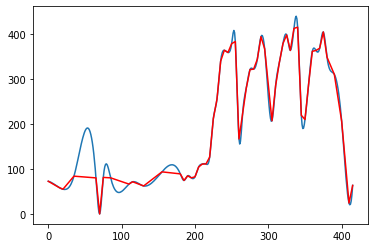

In [ ]:
plt.plot(x, y[-1,:], x_scaled_new, datanew, 'r')

In [ ]:
where_is_nan.shape

(58,)

In [ ]:
x_scaled

array([  0,  15,  20,  35,  60,  65,  70,  75,  85, 110, 115, 130, 155,
       180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240,
       245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 305, 310,
       315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375,
       380, 390, 400, 405, 410, 415])

In [ ]:
d0 = date(int(data[0,1][0:4]), int(data[0,1][4:6]), int(data[0,1][6:8]))
d1 = date(int(data[0,-3][0:4]), int(data[0,-3][4:6]),  int(data[0,-3][6:8]))
delta = d1 - d0
diff_firstdate_enddate = delta.days

In [ ]:
newdata.shape

(156, 60)

In [ ]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
x_scaled = []
for i in range(data.shape[1]-3):
  d0 = date(int(data[0,1][0:4]), int(data[0,1][4:6]), int(data[0,1][6:8]))
  d1 = date(int(data[0,i+1][0:4]), int(data[0,i+1][4:6]),  int(data[0,i+1][6:8]))
  delta = d1 - d0
  x_scaled.append(delta.days)

x_scaled = np.array(x_scaled)

In [ ]:
x_scaled

array([  0,   5,  10,  15,  20,  25,  30,  35,  50,  55,  70,  95, 100,
       105, 110, 120, 145, 150, 165, 190, 215, 220, 225, 230, 235, 240,
       245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305,
       310, 315, 320, 325, 330, 340, 345, 350, 355, 360, 365, 370, 375,
       380, 385, 390, 395, 400, 405, 410, 415, 425, 435, 440, 445, 450])

In [ ]:
datanew = data[50, 1:66].astype('float')
where_is_nan = np.isnan(data[50, 1:66].astype('float'))
datanew = datanew[~where_is_nan]
x_scaled = x_scaled[~where_is_nan]
max = 450
min = 0
X_std = (datanew - np.min(datanew)) / (np.max(datanew) - np.min(datanew))
datanew = X_std * (max - min) + min

In [ ]:
from scipy.interpolate import interp1d
f = interp1d(x_scaled, datanew, kind = 'cubic')

In [ ]:
yy

array([0.68767216, 0.59165619, 0.54051649, 0.52495103, 0.53565774,
       0.56333459, 0.59867954, 0.63239052, 0.65516551, 0.65770244,
       0.63069928, 0.56884997, 0.4828324 , 0.38732047, 0.29698806,
       0.22650905, 0.18654059, 0.17167281, 0.17247909, 0.1795328 ,
       0.18340734, 0.17692255, 0.16188413, 0.14234428, 0.12235516,
       0.10596896, 0.09624375, 0.09226124, 0.09210901, 0.09387466,
       0.09564579, 0.09590989, 0.09475405, 0.09266525, 0.09013047,
       0.0876367 , 0.08558112, 0.08400177, 0.08284688, 0.0820647 ,
       0.08160346, 0.08141139, 0.08143674, 0.08162774, 0.08193264,
       0.08229966, 0.08267705, 0.08301305, 0.08325589, 0.0833538 ,
       0.08325504, 0.08290941, 0.08227299, 0.08130347, 0.07995851,
       0.07819576, 0.07600357, 0.07349288, 0.07080533, 0.06808253,
       0.0654661 , 0.06309766, 0.06111884, 0.05967125, 0.05889652,
       0.05893627, 0.0599321 , 0.06202566, 0.06535856, 0.07007241,
       0.07630884, 0.08415255, 0.09346057, 0.10403299, 0.11566

In [ ]:
y = f(x)



In [ ]:
y

array([ 2.66415967e+01,  3.18621305e+01,  3.53078127e+01,  3.72222562e+01,
        3.78490737e+01,  3.74318782e+01,  3.62142825e+01,  3.44398995e+01,
        3.23523419e+01,  3.01952228e+01,  2.82121549e+01,  2.66286794e+01,
        2.55980512e+01,  2.52554534e+01,  2.57360693e+01,  2.71750819e+01,
        2.95845263e+01,  3.24838447e+01,  3.52693312e+01,  3.73372798e+01,
        3.80839846e+01,  3.71037178e+01,  3.47826647e+01,  3.17049886e+01,
        2.84548530e+01,  2.56164212e+01,  2.36326584e+01,  2.23817368e+01,
        2.16006306e+01,  2.10263136e+01,  2.03957599e+01,  1.95083620e+01,
        1.84131859e+01,  1.72217161e+01,  1.60454371e+01,  1.49958335e+01,
        1.41612038e+01,  1.35371030e+01,  1.30959002e+01,  1.28099645e+01,
        1.26516650e+01,  1.25933708e+01,  1.26074510e+01,  1.26662746e+01,
        1.27422109e+01,  1.28076288e+01,  1.28348975e+01,  1.27963860e+01,
        1.26644635e+01,  1.24114990e+01,  1.20098617e+01,  1.14430017e+01,
        1.07386935e+01,  

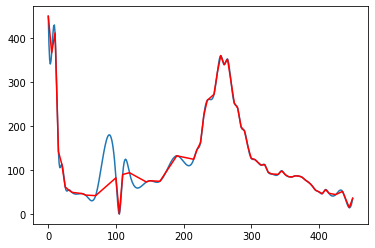

In [ ]:
plt.plot(x, y, x_scaled, datanew, 'r')

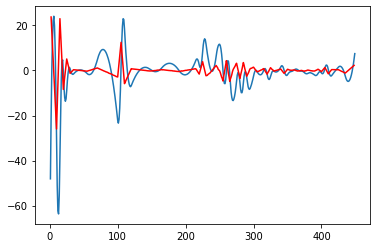

In [ ]:
from scipy.misc import derivative
first_der = derivative(f, x[1:-1], dx=1e-6, n = 1)
sec_der = derivative(f, x[2:-2], dx=1e-6, n = 2)

plt.plot(x[1:-1], first_der, x[2:-2], sec_der, 'r')
# plt.plot(x[2:-2], sec_der)

In [ ]:
max_argument = np.argmax(y)

Th_first_der = 0.1
Th_ndvi1 = 100
Th_ndvi2 = 80

id1 = np.where(abs(first_der[max_argument:]) < Th_first_der)
id2 = np.where(sec_der[max_argument:] > 0)
id3 = np.where(y[max_argument:] < Th_ndvi1)

id4 = np.where(abs(first_der[:max_argument]) < Th_first_der)
id5 = np.where(sec_der[:max_argument] > 0)
id6 = np.where(y[:max_argument] < Th_ndvi2)

In [ ]:
id6

(array([], dtype=int64),)

In [ ]:
from functools import reduce
harvesttime = reduce(np.intersect1d, (id1, id2, id3))[0] + max_argument
harvesttime
kahsttime = reduce(np.intersect1d, (id4, id5, id6))[-1]
kahsttime

IndexError: ignored

In [ ]:
first_der[kahsttime]

0.0007195261886305815

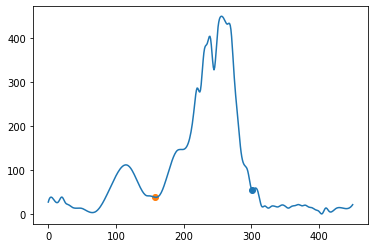

In [ ]:

plt.scatter(harvesttime, y[harvesttime])
plt.scatter(kahsttime, y[kahsttime])
plt.plot(x, y)

In [ ]:
id2

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  17,  18,  19,  20,
         21,  22,  31,  32,  33,  34,  42,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  52,  54,  55,  56,  57,  58,  59,  60,  66,  67,
         68,  69,  70,  71,  72,  81,  82,  83,  84,  85,  86,  87,  88,
         89,  90,  91, 101, 102, 103, 104, 105, 111, 112, 113, 114, 115,
        116, 122, 123, 124, 130, 131, 132, 133, 134, 141, 142, 143, 144,
        145, 151, 152, 153, 154, 160, 161, 162, 163, 164, 165, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 198,
        199, 200, 201, 202, 203, 204, 205, 206]),)

In [ ]:
id3

(array([ 58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
        188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
        201, 202, 203, 204, 205, 206, 207, 208, 209, 210]),)

In [ ]:
from scipy.interpolate import UnivariateSpline
f = UnivariateSpline(x_scaled, datanew)

In [ ]:
from scipy.interpolate import splev, splrep
f = splrep(x_scaled, datanew)
y = splev(x, f)
y

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [ ]:
from scipy.interpolate import CubicSpline
f = CubicSpline(x_scaled, data[1, 1:66])

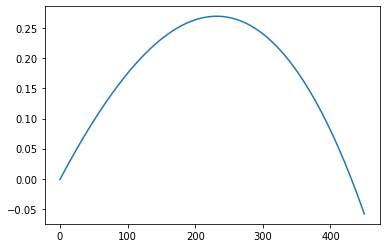

In [ ]:
plt.plot(x, y)